In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Triveni\Downloads\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

3 columns are representing same information, so just dropping column which are not important

In [4]:
drop_col=['url','phone','address', 'listed_in(city)']
df.drop(drop_col,axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

In [6]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [7]:
df.duplicated().sum()

9809

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(41908, 13)

In [10]:
df.nunique()

name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
dtype: int64

In [37]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            5914
votes                              0
location                          14
rest_type                        172
dish_liked                     20206
cuisines                          36
approx_cost(for two people)      253
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [40]:
# drop null values
df.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [41]:
# remove cuisines missing values
df=df[df.cuisines.isna()==False]

In [42]:
df.shape

(35791, 13)

In [43]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     14360
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [45]:
df.rename(columns={'listed_in(type)':'type','approx_cost(for two people)':'cost'},inplace=True)

In [46]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


In [47]:
df.rest_type.value_counts()

Quick Bites                   11580
Casual Dining                  8573
Cafe                           2923
Dessert Parlor                 1623
Delivery                       1415
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        1
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [48]:
#Filling missing values of rest_type with the most occuring value

df.rest_type.fillna(value='Quick Bites',inplace=True)

In [49]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      14360
cuisines            0
cost                0
reviews_list        0
menu_item           0
type                0
dtype: int64

In [50]:
df.dish_liked.head(10)

0    Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1    Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2    Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                          Masala Dosa
4                                  Panipuri, Gol Gappe
5    Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...
6                                                  NaN
7    Farmhouse Pizza, Chocolate Banana, Virgin Moji...
8    Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...
9    Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...
Name: dish_liked, dtype: object

# 1) Top restaurant chain 

In [90]:
top_restaurants=df['name'].value_counts()[:10]
top_restaurants

Onesta               85
Cafe Coffee Day      84
Empire Restaurant    69
Kanti Sweets         66
Just Bake            61
Five Star Chicken    61
Domino's Pizza       59
KFC                  59
Smoor                59
Pizza Hut            58
Name: name, dtype: int64

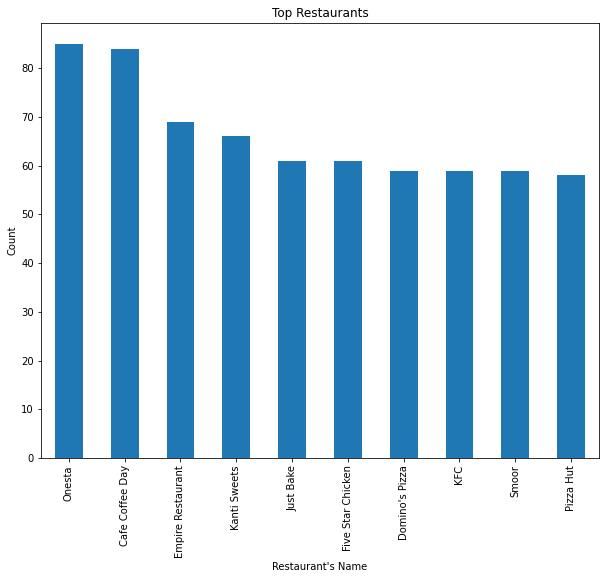

In [91]:
plt.figure(figsize=(10,8))
ax= top_restaurants.plot(kind='bar')
plt.title('Top Restaurants')
plt.xlabel("Restaurant's Name")
plt.ylabel('Count')
plt.show()

# How many of the restuarants do not accept online orders?

In [13]:
#Analysing Online order

df[['online_order']].value_counts()                       

online_order
Yes             26566
No              15342
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

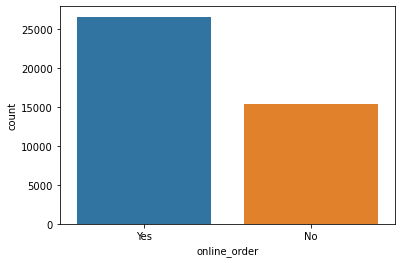

In [14]:
sns.countplot(df['online_order'])

so, 15342 restaurants do not accept online orders

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='count'>

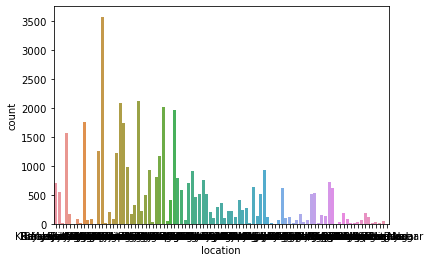

In [32]:
sns.countplot(df['location'])

In [33]:
df.groupby('location')['online_order'].agg({max})

,max
location,
BTM,Yes
Banashankari,Yes
Banaswadi,Yes
Bannerghatta Road,Yes
Basavanagudi,Yes
...,...
West Bangalore,Yes
Whitefield,Yes
Wilson Garden,Yes


Observation:

93 restaurants take online orders

# What is the ratio b/w restaurants that provide and do not provide table booking ?

In [15]:
#Anlysing book table column

df[['book_table']].value_counts()

book_table
No            35843
Yes            6065
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

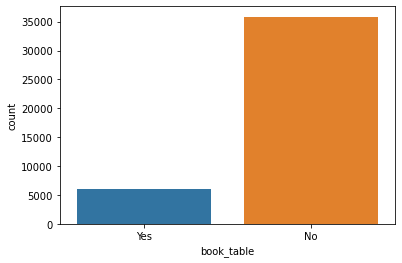

In [16]:
sns.countplot(df['book_table'])

6065 restaurants provide table booking

# Rating distribution

In [17]:
#Analysing rate column

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
#Splitting the rate into valuable Information
import numpy as np

df['rate']=df['rate'].str.replace(r'/5', '')
print(df['rate'].unique())


['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' 'NEW' '2.9' '3.5' nan '2.6' '3.8 ' '3.4' '4.5' '2.5'
 '2.7' '4.7' '2.4' '2.2' '2.3' '3.4 ' '-' '3.6 ' '4.8' '3.9 ' '4.2 '
 '4.0 ' '4.1 ' '3.7 ' '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 '
 '3.2 ' '2.6 ' '4.5 ' '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 '
 '3.0 ' '4.8 ' '2.3 ' '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ']


In [20]:
df['rate']=df['rate'].replace('NEW', np.nan)

In [27]:
df['rate']=df['rate'].replace('nan', np.nan)

In [28]:
df['rate']=df['rate'].replace('-', np.nan)

In [29]:
df['rate'].dropna()

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rate, Length: 35994, dtype: object

In [30]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

<AxesSubplot:xlabel='rate', ylabel='Density'>

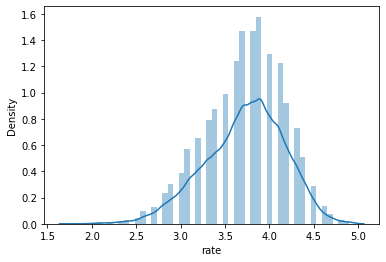

In [31]:
#rating distribution

sns.distplot(df['rate'])

most rating is between 2.5 and 5

# Is there any difference b/w votes of restaurants accepting and not accepting online orders?

In [34]:
# diff b/w votes of restaurants accepting and not accepting online orders
df.groupby(['online_order','votes']).agg('count')

name  book_table  rate  location  rest_type  dish_liked  \
online_order votes                                                            
No           0      3636        3636     4      3622       3604          68   
             1         1           1     1         1          1           0   
             2         3           3     3         3          3           0   
             4       516         516   509       516        516           0   
             5       277         277   277       277        277           0   
...                  ...         ...   ...       ...        ...         ...   
Yes          9080      5           5     5         5          5           5   
             9084      4           4     4         4          4           4   
             9085      2           2     2         2          2           2   
             16345     3           3     3         3          3           3   
             16832     3           3     3         3          3           3   

                    cuisines  approx_cost(for two people)  reviews_list  \
online_order votes                                                        
No           0          3618                         3581          3636   
             1             1                            1             1   
             2             3                            3             3   
             4           515                          508           516   
             5           277                          274           277   
...                      ...                          ...           ...   
Yes          9080          5                            5             5   
             9084          4                            4             4   
             9085          2                            2             2   
             16345         3                            3             3   
             16832         3                            3             3   

                    menu_item  listed_in(type)  
online_order votes                              
No           0           3636             3636  
             1              1                1  
             2              3                3  
             4            516              516  
             5            277              277  
...                       ...              ...  
Yes          9080           5                5  
             9084           4                4  
             9085           2                2  
             16345          3                3  
             16832          3                3  

[3218 rows x 11 columns]

# Which are the most common restaurant type in Banglore?

In [35]:
# Analyzing Location

df[['location']].value_counts()

location             
BTM                      3578
Koramangala 5th Block    2122
HSR                      2085
Whitefield               2010
Indiranagar              1973
                         ... 
Central Bangalore           5
Nagarbhavi                  4
Rajarajeshwari Nagar        2
Jakkur                      1
Peenya                      1
Length: 93, dtype: int64

there are total 93 different locations in Bangalore.

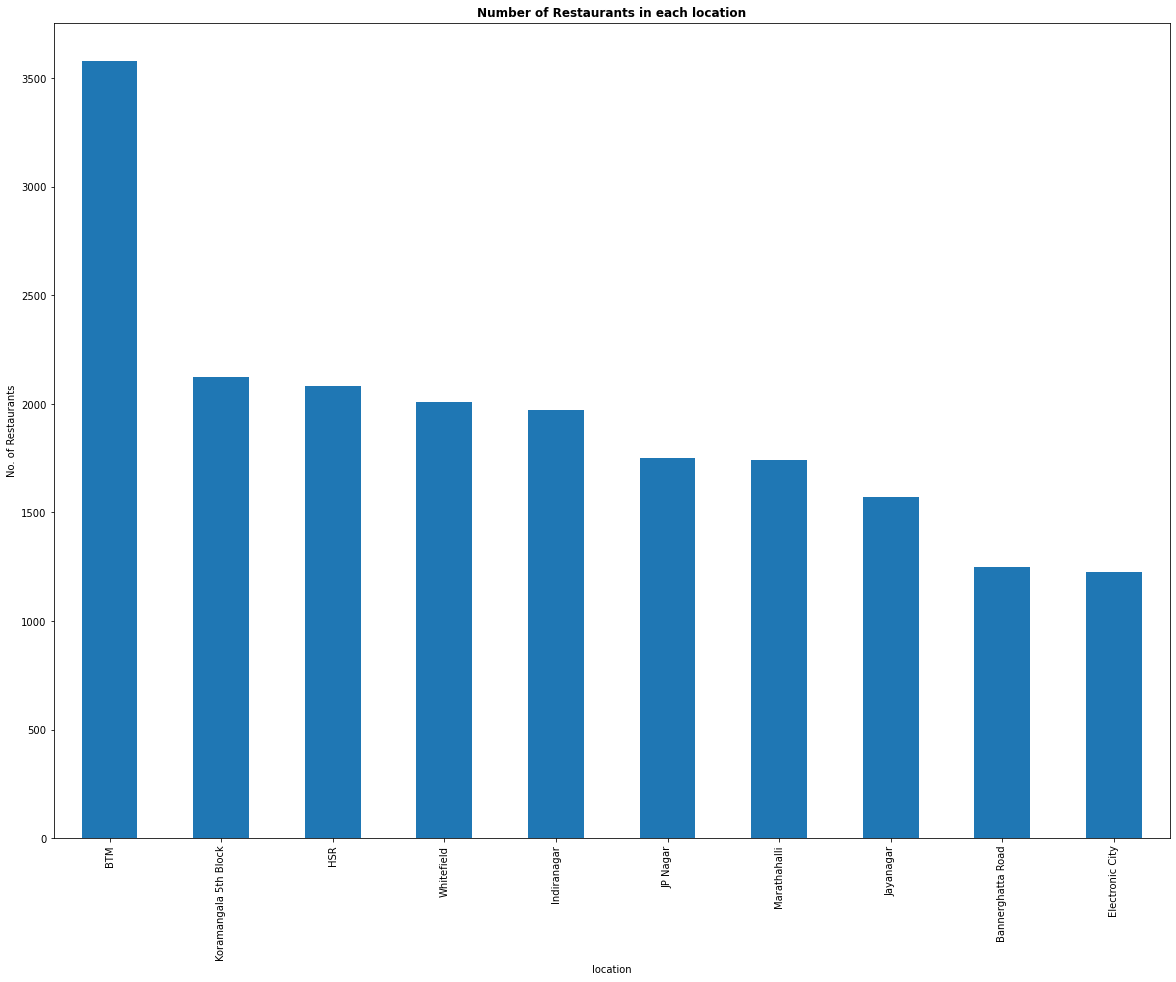

In [36]:
#plotting
plt.figure(figsize=(20,15))
ax =df.location.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in each location', weight='bold')
plt.xlabel('location')
plt.ylabel('No. of Restaurants')
plt.show()


BTM, Koramangala 5th Block, HSR, Whitefield, Indiranagar

# Cost factor ?

In [57]:
df.cost.value_counts()

400      4558
300      4334
500      3585
600      2838
200      2585
         ... 
199         2
70          1
5,000       1
3,700       1
80          1
Name: cost, Length: 63, dtype: int64

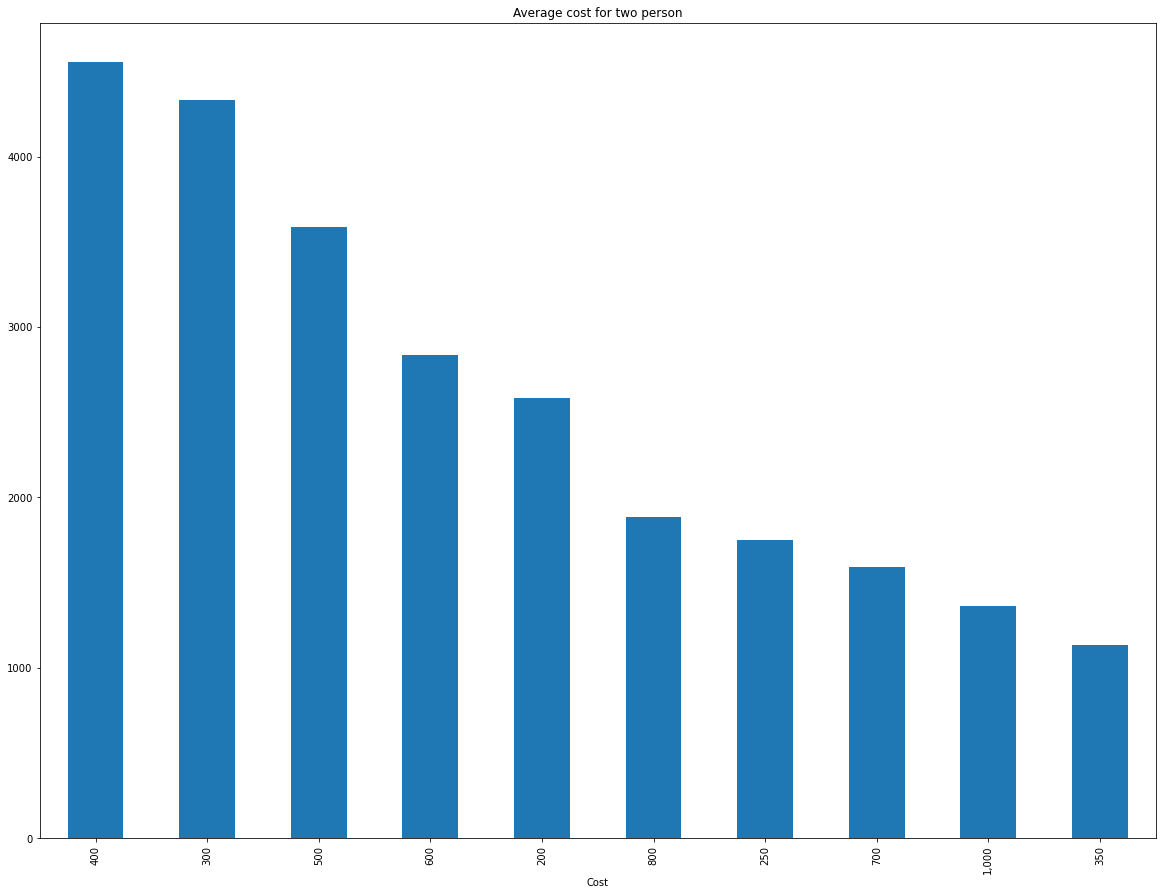

In [59]:
plt.figure(figsize=(20,15))
ax =df.cost.value_counts()[:10].plot(kind='bar')
plt.title('Average cost for two person')
plt.xlabel('Cost')
plt.show()

# Which are the foodie areas?

In [85]:
df.groupby('location')['cuisines'].value_counts(ascending=False)

location     cuisines                           
BTM          North Indian, Chinese                  250
             North Indian                           197
             Fast Food                               75
             Chinese, North Indian                   65
             Biryani, North Indian                   53
                                                   ... 
Yeshwantpur  North Indian, South Indian, Chinese      1
             North Indian, Street Food                1
             Seafood, North Indian, Mangalorean       1
             Street Food                              1
             Thai, Chinese, Momos                     1
Name: cuisines, Length: 6510, dtype: int64

# BTM is the most foodie area of Banglore

# Which are the most common cuisines in each locations?

In [86]:
df.groupby('location')['cuisines'].unique()

location
BTM                  [South Indian, North Indian, Chinese, Cafe, He...
Banashankari         [North Indian, Mughlai, Chinese, Chinese, Nort...
Banaswadi            [Cafe, Continental, Cafe, Fast Food, Italian, ...
Bannerghatta Road    [North Indian, Italian, Arabian, Biryani, Chin...
Basavanagudi         [North Indian, Rajasthani, North Indian, North...
                                           ...                        
West Bangalore       [Healthy Food, Chinese, Biryani, North Indian,...
Whitefield           [Cafe, Fast Food, Pizza, Burger, Beverages, No...
Wilson Garden        [Continental, Chinese, North Indian, South Ind...
Yelahanka            [South Indian, Biryani, Kerala, South Indian, ...
Yeshwantpur          [North Indian, Chinese, North Indian, Chinese,...
Name: cuisines, Length: 92, dtype: object

North Indian food is at top, followed by chinese and so on

# Heatmap of restaurant count on each location

In [ ]:
sns.heatmap(df)

# Which are the most popular cuisines of Bangalore?

In [88]:
top_cuisines=df['cuisines'].value_counts()[:10]
top_cuisines

North Indian                           1839
North Indian, Chinese                  1639
South Indian                           1007
Bakery, Desserts                        528
Biryani                                 480
Cafe                                    478
South Indian, North Indian, Chinese     474
Desserts                                457
Fast Food                               427
Ice Cream, Desserts                     343
Name: cuisines, dtype: int64

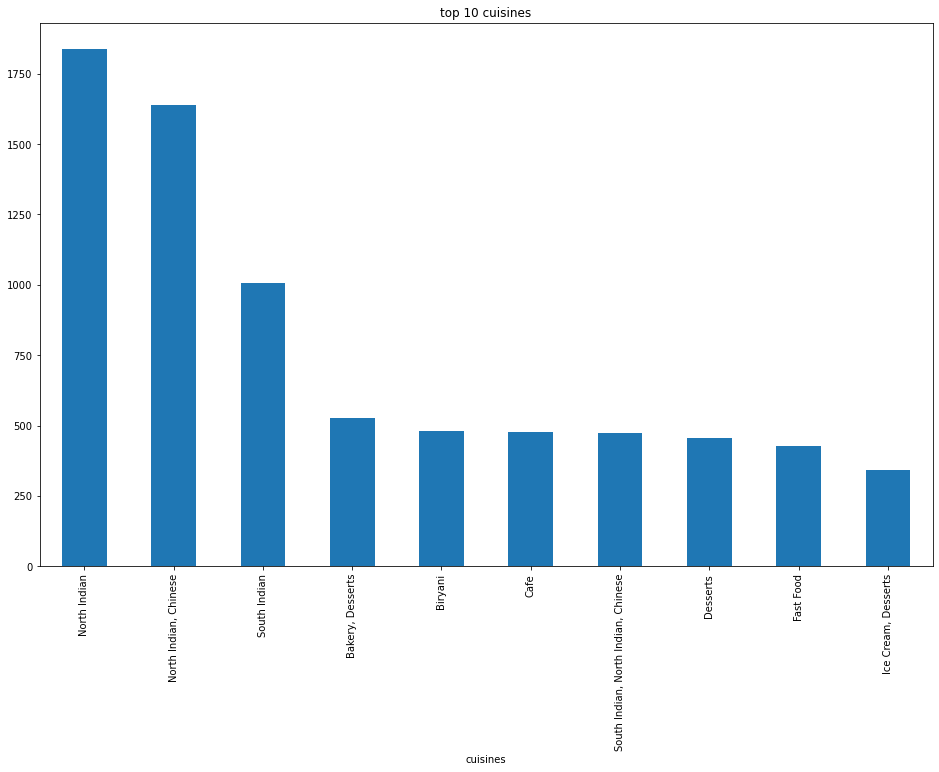

In [71]:
plt.figure(figsize=(16,10))
ax =df.cuisines.value_counts()[:10].plot(kind='bar')
plt.title('top 10 cuisines')
plt.xlabel('cuisines')
plt.show()

# Heatmap of North Indian restaurantWhat about South Indian cuisines?

# Analysing Restaurant chains

# a. Which are the most popular casual dining restaurant chains?

    i. Where are their outlets located?

# b. Top quick bites restaurant chains in Banglore
    i. Where are their outlets located?

# c. Top Cafes of Banglore?
    i. Where are their outlets located?